In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 356kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=9842b37416a1d2d836a8f1cd30cf05b451602e59c222dd8e612f05d9174ceaa1
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [1]:
import numpy as np
import cv2 as cv
import face_recognition as fr
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import euclidean

In [11]:
# Đọc ảnh đầu vào
img = cv.imread('data/temp4.jpg')

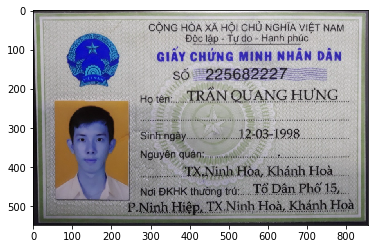

In [12]:
# Hiện ảnh đầu vào 
plt.imshow(img)
plt.show()

**Tiêu chuẩn ảnh chân dung**
* Ảnh màu. 
* Kích thước 3x4 cm. 
* Đầu để trần.
* Chụp ảnh chính diện, rõ mặt, rõ hai tai, không đeo kính, trang phục tác phong nghiêm túc, lịch sự.

In [10]:
# Kiểm tra ảnh đầu vào có phải là ảnh màu
# True: ảnh màu
# False: ảnh trắng đen
def check_color_image(img):
  if len(img.shape) == 3:
    return True
  else:
    return False

In [14]:
# Kiểm tra ảnh trên CMND có chứa khuôn mặt của người
# True: có đúng 1 khuôn mặt người
# False: không có hoặc có nhiều hơn 1 khuôn mặt người
def check_human_face(img):
  if len(fr.face_locations(img, model = 'cnn')) != 1:
    return False
  else:
    return True

In [15]:
# Kiểm tra xem khuôn mặt trong ảnh CMND có chính diện hay không (không quá lệch qua trái, phải)
# True: khuôn mặt chính diện
# False: khuôn mặt bị lệch trái, phải.
def check_face_direction(img):
  face_landmarks = fr.face_landmarks(img)
  dist_1 = euclidean(face_landmarks[0]['left_eye'][3], face_landmarks[0]['nose_bridge'][0])
  dist_2 = euclidean(face_landmarks[0]['right_eye'][0], face_landmarks[0]['nose_bridge'][0])
  
  if 0.9 <= (dist_1 / dist_2) <= 1.1:
    if 0.95 <= (face_landmarks[0]['left_eye'][3][1] / face_landmarks[0]['right_eye'][0][1]) <= 1.05:
      return True
    else:
      return False
  else:
    return False

In [16]:
# Kiểm tra xem khuôn mặt trong ảnh CMND có nhắm mắt hay không
# True: nhắm mắt
# False: mở mắt
def check_eye_closed(img):
  face_landmarks = fr.face_landmarks(img)
  dist_1 = euclidean(face_landmarks[0]['left_eye'][1], face_landmarks[0]['left_eye'][5])
  dist_2 = euclidean(face_landmarks[0]['left_eye'][2], face_landmarks[0]['left_eye'][4])
  dist_3 = euclidean(face_landmarks[0]['left_eye'][0], face_landmarks[0]['left_eye'][3])
  
  dist_4 = euclidean(face_landmarks[0]['right_eye'][1], face_landmarks[0]['right_eye'][5])
  dist_5 = euclidean(face_landmarks[0]['right_eye'][2], face_landmarks[0]['right_eye'][4])
  dist_6 = euclidean(face_landmarks[0]['right_eye'][0], face_landmarks[0]['right_eye'][3])
  
  ear_1 = (dist_1 + dist_2) / (2 * dist_3)
  ear_2 = (dist_4 + dist_5) / (2 * dist_6)
  
  if ear_1 <= 0.3 or ear_2 <= 0.3:
    return True
  else:
    return False

In [17]:
# Kiểm tra xem khuôn mặt trong ảnh CMND có hé môi (mở miệng) hay không
# True: hé môi
# False: không hé môi
def check_lip_opened(img):
  face_landmarks = fr.face_landmarks(img)
  if 0.98 <= face_landmarks[0]['top_lip'][-4][1] / face_landmarks[0]['bottom_lip'][-4][1] <= 1.02:
    return False
  else:
    return True

In [18]:
check_lip_opened(image)

NameError: name 'image' is not defined

In [19]:
# Kiểm tra khuôn mặt trong ảnh CMND có khớp với khuôn mặt của khách hàng
# True: khớp
# False: không khớp
def check_matched_faces(real_img, card_img):
  real_img_encoding = fr.face_encodings(real_img)[0]
  card_img_encoding = fr.face_encodings(card_img)[0]
  
  return fr.compare_faces([real_img_encoding], card_img_encoding)[0]

In [20]:
# Kiểm tra khuôn mặt trong ảnh CMND có đeo kính
# True: đeo kính
# False: không đeo kính
def check_eyeglasses(img):
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.GaussianBlur(img, (11,11), 0)

  sobel_y = cv.Sobel(img, cv.CV_64F, 0 ,1 , ksize=-1)
  sobel_y = cv.convertScaleAbs(sobel_y)
  edgeness = sobel_y
    
  retVal,thresh = cv.threshold(edgeness,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

  d = len(thresh) * 0.5
  x = np.int32(d * 6/7)
  y = np.int32(d * 3/4)
  w = np.int32(d * 2/7)
  h = np.int32(d * 2/4)

  x_2_1 = np.int32(d * 1/4)
  x_2_2 = np.int32(d * 5/4)
  w_2 = np.int32(d * 1/2)
  y_2 = np.int32(d * 8/7)
  h_2 = np.int32(d * 1/2)
    
  roi_1 = thresh[y:y+h, x:x+w] 
  roi_2_1 = thresh[y_2:y_2+h_2, x_2_1:x_2_1+w_2]
  roi_2_2 = thresh[y_2:y_2+h_2, x_2_2:x_2_2+w_2]
  roi_2 = np.hstack([roi_2_1,roi_2_2])
    
  measure_1 = sum(sum(roi_1/255)) / (np.shape(roi_1)[0] * np.shape(roi_1)[1])
  measure_2 = sum(sum(roi_2/255)) / (np.shape(roi_2)[0] * np.shape(roi_2)[1])
  measure = measure_1*0.3 + measure_2*0.7
    
  if measure > 0.15:
    return True
  else:
    return False

In [21]:
check_eyeglasses(img)

True

In [ ]:
check_color_image(img)

True

In [22]:
check_human_face(img)

True

In [ ]:
real_img = cv.imread('Chanyeol 1.png', 1)
card_img = cv.imread('Chanyeol 2.jpg', 1)
check_matched_faces(real_img, card_img)

True

In [ ]:
check_eye_closed(img)

False

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(192, 307), (190, 336), (192, 366), (199, 395), (209, 424), (224, 449), (239, 476), (254, 501), (277, 514), (307, 515), (343, 502), (379, 484), (411, 461), (432, 430), (444, 392), (452, 352), (455, 314)]
The left_eyebrow in this face has the following points: [(206, 268), (218, 263), (233, 265), (247, 270), (260, 278)]
The right_eyebrow in this face has the following points: [(288, 278), (313, 271), (340, 271), (365, 277), (388, 291)]
The nose_bridge in this face has the following points: [(275, 312), (271, 334), (267, 356), (263, 377)]
The nose_tip in this face has the following points: [(253, 390), (261, 396), (269, 399), (280, 398), (292, 397)]
The left_eye in this face has the following points: [(222, 301), (234, 296), (247, 300), (258, 313), (244, 312), (230, 308)]
The right_eye in this face has the following points: [(309, 319), (319, 307), (335, 308), (352, 316), (337, 320), (320, 321)]
The to

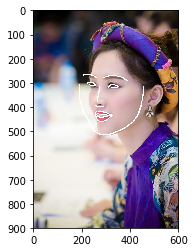

In [ ]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("2.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:
  
  # Print the location of each facial feature in this image
  for facial_feature in face_landmarks.keys():
    print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

  # Let's trace out each facial feature in the image with a line!
  for facial_feature in face_landmarks.keys():
    d.line(face_landmarks[facial_feature], width=5)

# Show the picture
#pil_image.show()
plt.imshow(pil_image)
plt.show()